In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('place.csv')
df.head()

,marks,experience,placed
0,20,4,0
1,78,20,1
2,38,13,1
3,15,10,0
4,32,11,0


In [4]:
df.shape

(230, 3)

In [5]:
df.describe()

,marks,experience,placed
count,230.000000,230.000000,230.000000
mean,44.060870,14.769565,0.569565
std,29.057926,8.794795,0.496217
min,1.000000,1.000000,0.000000
25%,19.250000,7.000000,0.000000
50%,39.000000,15.000000,1.000000
75%,67.000000,23.000000,1.000000
max,100.000000,30.000000,1.000000


In [6]:
df.duplicated().sum()

8

In [7]:
df.isnull().sum()

marks         0
experience    0
placed        0
dtype: int64

In [8]:
df['placed'].value_counts()

placed
1    131
0     99
Name: count, dtype: int64

In [9]:
x=df.drop(columns='placed')
y=df['placed']
x

,marks,experience
0,20,4
1,78,20
2,38,13
3,15,10
4,32,11
...,...,...
225,25,2
226,10,28
227,34,13
228,87,27


In [10]:
y

0      0
1      1
2      1
3      0
4      0
      ..
225    0
226    0
227    1
228    1
229    1
Name: placed, Length: 230, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101,stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf=LogisticRegression()

In [15]:
clf.fit(x_train,y_train)


LogisticRegression()

In [16]:
y_pred_train=clf.predict(x_train)

In [17]:
y_pred_test=clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.98      0.97      0.97        92

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.90      0.95        39

    accuracy                           0.94        69
   macro avg       0.94      0.95      0.94        69
weighted avg       0.95      0.94      0.94        69



In [21]:
from mlxtend.plotting import plot_decision_regions

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


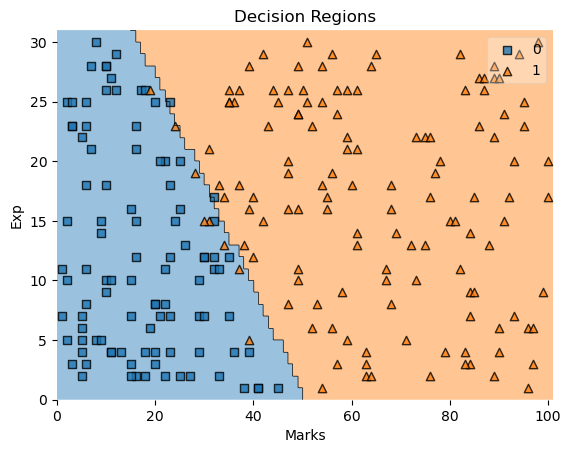

In [22]:
plot_decision_regions(x.values,y.values,clf=clf)
plt.xlabel('Marks')
plt.ylabel('Exp')
plt.title('Decision Regions')
plt.show()

In [23]:
confusion_matrix(y_train,y_pred_train)

array([[67,  2],
       [ 3, 89]], dtype=int64)

In [24]:
confusion_matrix(y_test,y_pred_test)

array([[30,  0],
       [ 4, 35]], dtype=int64)

In [25]:
cm=confusion_matrix(y_test,y_pred_test)

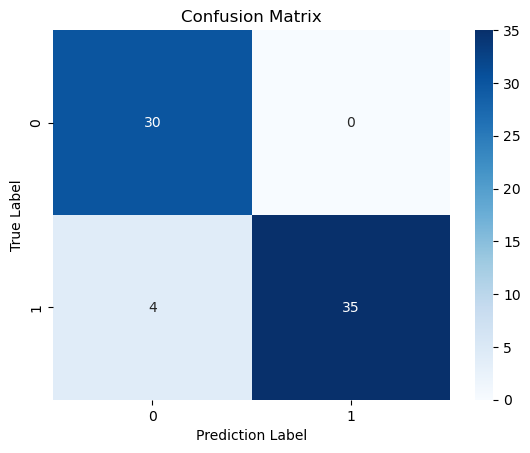

In [28]:
sns.heatmap(cm,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Prediction Label")
plt.title('Confusion Matrix')
plt.show()

In [29]:
# to check the probabilities

In [30]:
prob_check = clf.predict_proba(x_test)

In [31]:
prob_check

array([[2.16226964e-07, 9.99999784e-01],
       [1.69612967e-05, 9.99983039e-01],
       [2.05667749e-09, 9.99999998e-01],
       [9.99999999e-01, 1.22743400e-09],
       [2.22044605e-15, 1.00000000e+00],
       [9.99999999e-01, 9.17466970e-10],
       [9.68600813e-01, 3.13991873e-02],
       [7.26897870e-05, 9.99927310e-01],
       [2.28776553e-10, 1.00000000e+00],
       [9.14307617e-01, 8.56923834e-02],
       [9.99998516e-01, 1.48413913e-06],
       [2.88864266e-10, 1.00000000e+00],
       [9.99999999e-01, 1.14129055e-09],
       [7.32896188e-10, 9.99999999e-01],
       [9.68144100e-01, 3.18559004e-02],
       [9.93681625e-01, 6.31837524e-03],
       [9.99999998e-01, 2.46640741e-09],
       [8.60630998e-04, 9.99139369e-01],
       [5.24614092e-01, 4.75385908e-01],
       [3.06199510e-13, 1.00000000e+00],
       [1.00000000e+00, 1.34513944e-10],
       [9.98044847e-01, 1.95515259e-03],
       [9.99990175e-01, 9.82520270e-06],
       [9.99954714e-01, 4.52862746e-05],
       [1.000000

In [32]:
prob_check[0][0]+prob_check[0][1]

1.0

In [33]:
prob_check = clf.predict_proba(x_test)[:,1]

In [34]:
prob_check

array([9.99999784e-01, 9.99983039e-01, 9.99999998e-01, 1.22743400e-09,
       1.00000000e+00, 9.17466970e-10, 3.13991873e-02, 9.99927310e-01,
       1.00000000e+00, 8.56923834e-02, 1.48413913e-06, 1.00000000e+00,
       1.14129055e-09, 9.99999999e-01, 3.18559004e-02, 6.31837524e-03,
       2.46640741e-09, 9.99139369e-01, 4.75385908e-01, 1.00000000e+00,
       1.34513944e-10, 1.95515259e-03, 9.82520270e-06, 4.52862746e-05,
       2.28111945e-11, 1.06686412e-07, 1.00000000e+00, 1.00000000e+00,
       1.82826941e-04, 9.99998483e-01, 9.99999999e-01, 8.25972001e-06,
       8.92109996e-01, 1.00000000e+00, 2.80515689e-01, 3.55949868e-01,
       1.00000000e+00, 9.99999999e-01, 9.99993315e-01, 9.85738283e-01,
       9.99999915e-01, 9.74758076e-01, 9.99999977e-01, 3.72800665e-01,
       1.00000000e+00, 9.99999743e-01, 3.64677253e-03, 2.97055844e-05,
       9.99999702e-01, 1.68463015e-05, 3.14005185e-01, 1.00000000e+00,
       1.29926523e-02, 9.88849349e-03, 9.99921824e-01, 5.95656278e-02,
      

In [36]:
(prob_check>=0.5).astype(int)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1])